# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


100%|██████████| 715/715 [00:00<00:00, 4606647.25B/s]


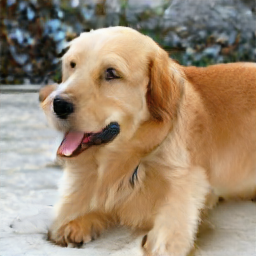

In [ ]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_int, truncated_noise_sample
from PIL import Image
import numpy as np

# Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# Generate class and noise vectors
class_vector = one_hot_from_int(207, batch_size=1)
noise_vector = truncated_noise_sample(truncation=0.4, batch_size=1)

# Convert to tensors
class_vector = torch.from_numpy(class_vector)
noise_vector = torch.from_numpy(noise_vector)

with torch.no_grad():
    output = model(noise_vector, class_vector, 0.4)

# Postprocess output tensor to image
output = output.squeeze().permute(1, 2, 0)
output = ((output + 1) / 2.0).clamp(0, 1)
output = (output.numpy() * 255).astype(np.uint8)
Image.fromarray(output)


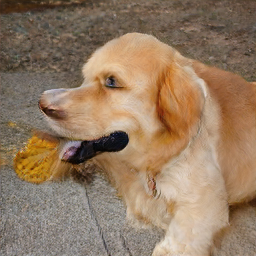

In [ ]:
from pytorch_pretrained_biggan import truncated_noise_sample

# Change the seed for variety
noise_vector = truncated_noise_sample(truncation=0.4, batch_size=1)
class_vector = one_hot_from_int(207, batch_size=1)

# Convert to tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

with torch.no_grad():
    output = model(noise_vector, class_vector, 0.4)

# Display image
output = output.squeeze().permute(1, 2, 0)
output = ((output + 1) / 2.0).clamp(0, 1)
output = (output.numpy() * 255).astype(np.uint8)
Image.fromarray(output)

## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?